<div class="alert alert-success">
<b>Комментарий ревьюера v 3.0 ✔️:</b> Отлично, Екатерина! Ты здорово поработала над комментариями и теперь твой проект принят.
    
Спасибо за работу и успехов в следующих проектах!)

<div class="alert alert-danger">
<b>Комментарий ревьюера v 2.0 ❌:</b> Екатерина, ты хорошо поработала над комментариями, но все же у меня еще остались замечания, они отмечены v 2.0 и красным цветом. Пожалуйста, исправь их и я буду рад принять твой проект)

<div style="border:solid green 2px; padding: 20px">
<b>Привет!</b>

Меня зовут Михаленко Дмитрий, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделала большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Объёмная и творческая аналитическая задача, тем интереснее будет с ней справиться! </div>

### Откройте файл с данными и изучите общую информацию. 

*Изучим первые 10 строк таблицы, случайную выборку, описательную статистику, общую информацию о датасете и построим гистограммы для всех числовых столбцов таблицы.*

In [1]:
# Загрузим библиотеки и прочтём файл:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# Выведем первые 10 строк таблицы:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
# Выведем на экран случайную строку:
data.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2371,20,6000000.0,52.0,2018-08-28T00:00:00,2,2.75,19.0,29.0,7,False,...,8.0,1.0,Санкт-Петербург,37781.0,14657.0,0.0,NaN,0.0,NaN,119.0


In [3]:
# Изучим общую инофрмацию о датасете:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# Посмотрим на описательную статистику по данным:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

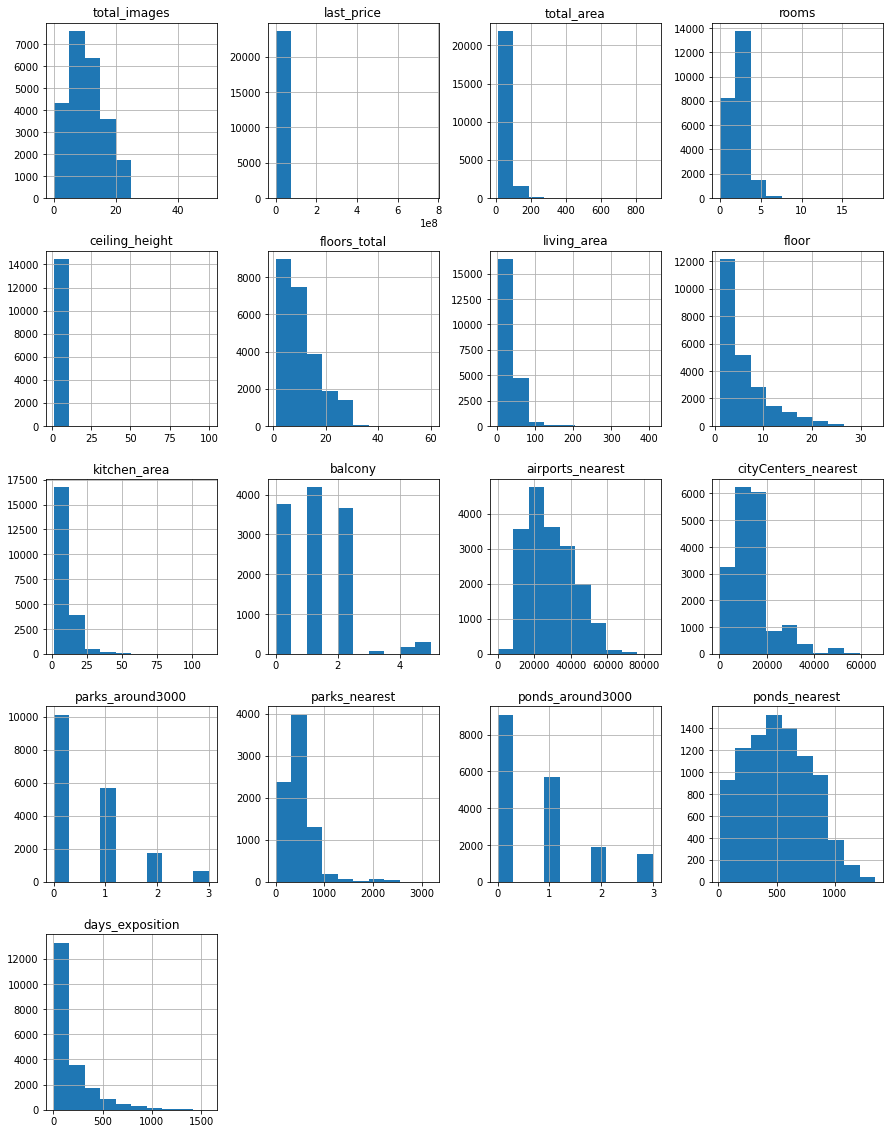

In [5]:
# Построим гистограммы по числовым значениям данных таблицы:
data.hist(figsize=(15, 20))

**Вывод:**

- необходимо заполнить пропущенные значения, где это возможно
- избавится от аномальный значений
- исравить тип данных, где необходимо
- привести названия столбцов к единообразию


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошее начало и первый промежуточный вывод, так держать. </div>

### Предобработка данных

**Определеляем пропушенные значения в стоблцах, приведем названия столбцов к единообразию.**

In [6]:
# Переименуем столбы:
cols = ['total_images',
        'last_price',
        'total_area_m2',
        'first_day_exposition',
        'number_of_rooms',
        'ceiling_height_m',
        'total_floors_in_building',
        'living_area_m2',
        'floor',
        'is_apartment',
        'is_studio',
        'open_plan',
        'kitchen_area_m2',
        'number_of_balconies',
        'location',
        'nearest_airport_distance_m',
        'city_center_distance_m',
        'parks_numbers_within_3km',
        'nearest_park_distance_m',
        'ponds_number_within_3km',
        'nearest_pond_distance_m',
        'days_exposition']

data.set_axis(cols, axis='columns', inplace=True)

In [7]:
# Убедимся, что столбцы переименованы:
data.columns.tolist()

['total_images',
 'last_price',
 'total_area_m2',
 'first_day_exposition',
 'number_of_rooms',
 'ceiling_height_m',
 'total_floors_in_building',
 'living_area_m2',
 'floor',
 'is_apartment',
 'is_studio',
 'open_plan',
 'kitchen_area_m2',
 'number_of_balconies',
 'location',
 'nearest_airport_distance_m',
 'city_center_distance_m',
 'parks_numbers_within_3km',
 'nearest_park_distance_m',
 'ponds_number_within_3km',
 'nearest_pond_distance_m',
 'days_exposition']

In [8]:
# Отсортируем количество пропущенных значений в столбцах по убыванию:
data.isnull().sum().sort_values(ascending=False)

is_apartment                  20924
nearest_park_distance_m       15620
nearest_pond_distance_m       14589
number_of_balconies           11519
ceiling_height_m               9195
nearest_airport_distance_m     5542
city_center_distance_m         5519
ponds_number_within_3km        5518
parks_numbers_within_3km       5518
days_exposition                3181
kitchen_area_m2                2278
living_area_m2                 1903
total_floors_in_building         86
location                         49
total_images                      0
last_price                        0
is_studio                         0
floor                             0
number_of_rooms                   0
first_day_exposition              0
total_area_m2                     0
open_plan                         0
dtype: int64

<div class="alert alert-info"> <b>Комментарий студента:</b> Привет, Дмитрий! Ниже добавила размышления о пропусках.</div>

*Сделаю несколько предположений о природе пропусков:*

Возможно таких параметров как расстояние до центра, аэропорта, ближайшего парка и водоёма, апартаменты не предполагалось изначально и они были добавлены позже.

И/или люди их просто не заполняют, так как им эта информация неизвестна, искать её лень и видимо она на обязательна для заполнения. Сюда же можно отнести и информацию о количестве балконов, скорее всего где пропуски, они вообще отсутсвуют, но пользователи не ставят 0, а оставляют пустые ячейки.

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Вполне вероятно все так и есть

**Заполняем пропуски и меняем тип данных в стобцах.**

In [9]:
# Посмотрим на уникальные значения в столбце 'is_apartment':
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [10]:
# Nan заменим на False, изменим тип данных на Bool и проверим изменения:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'] = data['is_apartment'].astype(bool)
data['is_apartment'].unique()

array([False,  True])

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> False здесь подойдет </div>

In [11]:
# В столбцах ниже заменим пропущенные значения на 0, так как информация о наличии парков или водоемов 
# не является критически важной для дальнейшего анализа, и изменим тип данных на int:
data['nearest_park_distance_m'] = data['nearest_park_distance_m'].fillna(0).astype(int)
data['nearest_pond_distance_m'] = data['nearest_pond_distance_m'].fillna(0).astype(int)
data['ponds_number_within_3km'] = data['ponds_number_within_3km'].fillna(0).astype(int)
data['parks_numbers_within_3km'] = data['parks_numbers_within_3km'].fillna(0).astype(int)

In [12]:
# Также заменим пропущенные значения на 0 в столбце ниже, предположив, что если нет информации о количестве балконов, 
# значит скорее всего в жилом помещении балконы отсутсвуют и изменим тип данных на int:
data['number_of_balconies'] = data['number_of_balconies'].fillna(0).astype(int)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Нули в данном случае хорошие замены </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Для борьбы с warnings могу посоветовать такой прием:
    
import warnings

warnings.filterwarnings("ignore")

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавила метод борьбы с warnings в первую ячейку кода проекта.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Хорошо

In [13]:
# Заменяем оставшиеся пустые значения высоты потолков на медианное значение по всему датасету:
data['ceiling_height_m'] = data.groupby(['location', 'total_floors_in_building'])['ceiling_height_m'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height_m'].fillna(data['ceiling_height_m'].median(), inplace=True)

# Заменяем пустые значения жилой площади и площади кухни:
living_ratio = data['living_area_m2'].mean() / data['total_area_m2'].mean()
kitchen_ratio = data['kitchen_area_m2'].mean() / data['total_area_m2'].mean()
data['living_area_m2'].fillna(living_ratio * data['total_area_m2'], inplace=True)
data['kitchen_area_m2'].fillna(kitchen_ratio * data['total_area_m2'], inplace=True)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Согласен с такими вариантами заполнения </div>

In [14]:
# Удаляем записи где отсутствует локация и этажность:
data.dropna(subset=['location'], inplace=True)
data.dropna(subset=['total_floors_in_building'], inplace=True)

# Приводим этажность к целочисленному типу:
data['total_floors_in_building'] = data['total_floors_in_building'].astype(int)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, можно просто отбросить </div>

In [15]:
# Приводим в целочисленный тип стоимость квартиры:
data['last_price'] = data['last_price'].astype(int)

# Приводим к типу даты дату публикации:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Такие типы данных тут подойдут лучше </div>

In [16]:
# Заменим пропуски в days_exposition и заменим тип данных:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Еще в days_exposition неплохо было бы посмотреть на пропуски по годам, вдруг так можно увидеть какую-то закономерность

<div class="alert alert-info"> <b>Комментарий студента:</b> Как можно посмотреть на пропуски по годам до добавления столбца "year_exposition"? </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v 2.0 ⚠️:</b> Но ведь можно просто перенести добавление столбца выше или наоборот добавить сам этот анализ ниже)

In [17]:
# Смотрим количество пропущенных значений:
data.isnull().sum().sort_values(ascending=False)

nearest_airport_distance_m    5524
city_center_distance_m        5501
total_images                     0
last_price                       0
nearest_pond_distance_m          0
ponds_number_within_3km          0
nearest_park_distance_m          0
parks_numbers_within_3km         0
location                         0
number_of_balconies              0
kitchen_area_m2                  0
open_plan                        0
is_studio                        0
is_apartment                     0
floor                            0
living_area_m2                   0
total_floors_in_building         0
ceiling_height_m                 0
number_of_rooms                  0
first_day_exposition             0
total_area_m2                    0
days_exposition                  0
dtype: int64

In [18]:
# Посмотрим как изменились типы данных:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                23565 non-null  int64         
 1   last_price                  23565 non-null  int64         
 2   total_area_m2               23565 non-null  float64       
 3   first_day_exposition        23565 non-null  datetime64[ns]
 4   number_of_rooms             23565 non-null  int64         
 5   ceiling_height_m            23565 non-null  float64       
 6   total_floors_in_building    23565 non-null  int64         
 7   living_area_m2              23565 non-null  float64       
 8   floor                       23565 non-null  int64         
 9   is_apartment                23565 non-null  bool          
 10  is_studio                   23565 non-null  bool          
 11  open_plan                   23565 non-null  bool      

In [19]:
len(data['location'].unique())

364

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Молодец, что поработала с неявными дубликатами

In [20]:
# Поищем дубликаты в столбце 'location',
# приведем всё к нижнему регистру и заменим букву 'ё' на 'е':
data['location'] = data['location'].str.lower()
data['location'] = data['location'].str.replace('ё', 'е', regex=True)
len(data['location'].unique())

# удалили 34 дубликата

330

<div class="alert alert-info"> <b>Комментарий студента:</b> Ниже добавила работу с аномалиями и вывод.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Отличная работа с аномалиями

In [21]:
# Подробнее изучим аномалии в наборе данных:
data.describe()

,total_images,last_price,total_area_m2,number_of_rooms,ceiling_height_m,total_floors_in_building,living_area_m2,floor,kitchen_area_m2,number_of_balconies,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.737873,10.675875,34.591303,5.878124,10.500277,0.593677,28797.082701,14192.656056,0.468831,167.169998,0.589900,198.738129,156.420115
std,5.681156,1.091093e+07,35.657060,1.078591,1.009172,6.594823,22.372806,4.871485,6.038042,0.960660,12632.499735,8613.348153,0.748403,306.301628,0.883966,305.195521,213.517293
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,0.000000,0.000000,0.000000,22.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,0.000000,0.000000,0.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.750000,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,301.000000,1.000000,389.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Можно выделить следующее:**

- максимальное значение общей площади в 900 м2;
даже если предположить, что данный объект относится к категории "элитной" недвижимости, 
все равно это значение чрезвачайно велико, т.к. даже общая площадь "петхаузов" как правило не превышает 300 м2.

- максимальная высота потолков в 100 м и минимальная 1 м;
стандартная высота потолков в квартирах начинается от 2,65 м, иногда может доходить до 6, 
если рассматривать недвижимость в ценовом сегменте значительно "выше среднего".

- 1580 дней было размещено объявление (от публикации до снятия) и минимальные значения в диапазоне от 0 до 2-х дней;
1580/365 = 4,33 - более 4-х лет
это, конечно, не относится к категории невозможного, но лучше посмотреть сколько этих долгих продаж,
длящихся, например, более 3-х лет.
0-2 дня размещения объявления - скорее всего это просто ошибки
например, разместили объявление и сразу же (или почти сразу) его удалили.

- 60 этажей в здании;
этот параметр проще и быстрее всех остальных проверить, сведя возможность ошибки к минимуму:
    по состоянию на 2019 год самое высокое здание в Санкт-Петербурге БЦ "Лахта Центр", 
    в этом здании 87 этажей и есть жилая недвижимость, квартиры в «Лахта центре» продаваться не будут.
    БЦ "Лидер Тауэр" - 42 этажа, в нем только коммерческая недвижимость.
    ЖК "Князь Александр Невский" - 37 этажей, его можно взять за образец, 
    так как в Ленинградской области нет жилый домов выше 28 этажей.
    
Начнем корректировку датасета с параметра общей этажности.

In [22]:
# Делим количество квартир ниже 37 этажа на общее число объектов:
print(len(data.query('total_floors_in_building < 38')) / len(data))

0.9999151283683428


In [23]:
# Корректируем датасет, отбросив все квартиры выше 37-го этажа:
data = data.query('total_floors_in_building < 38')

In [24]:
# Убираем слишком высокие и слишком низкие потолки:
data = data.query('2 <= ceiling_height_m <= 10')

In [25]:
# Удаляем публикации просуществовавшие менее 3-х дней:
data = data.query('days_exposition > 3')

In [26]:
# Посмотрим сколько осталось квартир с площадью более 350 м2:
print(len(data.query('total_area_m2 > 350')) / len(data))

0.0014848544842605426


In [27]:
# Удалим из датасета объекты общая площадь которых превышает 350 м2, хоть их ничтожно малое количество, 
# они могут сильно исказить показатели и негативно повлиять на результат анализа.
data = data.query('total_area_m2 < 350')

In [28]:
# Посмотрим на обновленные данные:
data.describe()

,total_images,last_price,total_area_m2,number_of_rooms,ceiling_height_m,total_floors_in_building,living_area_m2,floor,kitchen_area_m2,number_of_balconies,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
count,20174.000000,2.017400e+04,20174.000000,20174.000000,20174.000000,20174.000000,20174.000000,20174.000000,20174.000000,20174.000000,15558.000000,15578.000000,20174.000000,20174.000000,20174.000000,20174.000000,20174.000000
mean,9.628631,6.090715e+06,58.329488,2.019282,2.702759,10.859770,33.359115,5.971845,10.299368,0.593338,28843.985474,14303.479715,0.463319,165.813324,0.586597,199.817884,182.167939
std,5.643755,7.748980e+06,30.347051,1.030240,0.240999,6.627696,19.592714,4.932168,5.523536,0.949050,12712.155662,8560.484521,0.744196,306.954425,0.878146,305.998998,220.036997
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,208.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,6.000000,3.400000e+06,39.500000,1.000000,2.550000,5.000000,18.600000,2.000000,7.000000,0.000000,18490.000000,9490.000000,0.000000,0.000000,0.000000,0.000000,45.000000
50%,9.000000,4.500000e+06,50.800000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26786.000000,13171.000000,0.000000,0.000000,0.000000,0.000000,97.000000
75%,14.000000,6.500000e+06,67.800000,3.000000,2.750000,16.000000,41.300000,8.000000,11.773069,1.000000,37407.000000,16378.000000,1.000000,293.000000,1.000000,393.750000,233.000000
max,50.000000,3.300000e+08,347.500000,16.000000,8.300000,35.000000,260.000000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<div class="alert alert-danger">
<b>Комментарий ревьюера v 2.0 ❌:</b> Но посмотри также на нижнее значение цены, оно точно не выглядит правдоподобным

<div class="alert alert-danger">
<b>Комментарий ревьюера v 3.0 ❌:</b> Не буду уже только из-за этого отправлять проект еще раз, но посмотри на цену 12190, едва-ли такая может быть в действительности

**Вывод:**

- пропущенные значения, где было возможно, заменены на 0 или среднее медианное значение;
- данные были очищены от аномалий;
- исравлен тип данных, где необходимо;
- названия столбцов приведены к единообразию, на мой, авторский вкус.

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Промежуточный вывод добавлен

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> В разделе "Предобработка данных" было проведено довольно много анализа и работы, все же стоит написать по нему хотя бы короткий вывод.
    
Также по заданию тут просили проанализировать и обработать аномалии в датасете, посоветую использовать для этого describe

### Посчитайте и добавьте в таблицу новые столбцы

In [29]:
# Посчитаем цену 1 квадратного метра:
data['price_per_square_meter'] = data['last_price'] / data['total_area_m2']

# Для удобства просмотра приведем к типу int:
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

<div class="alert alert-info"> <b>Комментарий студента:</b> Ниже добавила немного работы со стоимостью 1 м2.</div>

In [30]:
# Хотелось бы посмотреть на топ-10 самых "дешевых" м2
# можно рассмотреть и топ-10 дорогих, но, во-первых, страшно, а во-вторых не вижу особого смысла, 
# т.к. скорее всего никакого объяснимого потолка для этого значения нет:
data.groupby('location').agg({'price_per_square_meter':'mean'}).sort_values(by='price_per_square_meter').head(10)

,price_per_square_meter
location,
деревня старополье,11206.0
поселок станции свирь,11481.0
деревня вахнова кара,11688.0
деревня выскатка,12335.0
поселок совхозный,12628.5
деревня малая романовка,12724.0
поселок тесово-4,12931.0
деревня ям-тесово,13711.0
поселок житково,14956.0


In [31]:
# В таблице выше только поселки и деревни, это может соответствовать действительности.
# В 2019 году средняя стоимость 1 м2 в составляла более 50 тысяч рублей.
# Посмотрим соотношение квартир ниже рыночной стоимости к их общему количеству:
print(len(data.query('price_per_square_meter < 50000')) / len(data))

# "Дешёвых" квартир меньше 8%, думаю их можно оставить в датасете:

0.07192425894715972


In [32]:
# Добавим столбцы c днем, месяцем и годом размещения объявления:
data['day_of_week_exposition'] = data['first_day_exposition'].dt.day_name()
data['month_exposition'] = data['first_day_exposition'].dt.month_name()
data['year_exposition'] = data['first_day_exposition'].dt.year

In [33]:
# Напишем функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1

def floor_category(row):
    floors_total = row['total_floors_in_building']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
# Категоризуем этажи с помощью функции: 
data['floor_category'] = data.apply(floor_category, axis = 1)

In [34]:
# Добавим столбец с расстоянием до центра города в километрах:
data['city_center_distance_km'] = round(data['city_center_distance_m'] / 1000)

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Обрати внимание, что по заданию просили округлить эти значения до целых

<div class="alert alert-info"> <b>Комментарий студента:</b> Округлила значения до целых.</div>

In [35]:
# Посмотрим на изменения в таблице:
data.head()

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_building,living_area_m2,floor,is_apartment,...,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition,price_per_square_meter,day_of_week_exposition,month_exposition,year_exposition,floor_category,city_center_distance_km
1,7,3350000,40.4,2018-12-04,1,2.650,11,18.600000,1,False,...,0,0,0,81,82920,Tuesday,December,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.600,5,34.300000,4,False,...,90,2,574,558,92785,Thursday,August,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.600,14,90.785766,9,False,...,84,3,234,424,408176,Friday,July,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.030,14,32.000000,13,False,...,112,1,48,121,100000,Tuesday,June,2018,другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.625,12,14.400000,5,False,...,0,0,0,55,95065,Monday,September,2018,другой,NaN


**Вывод:**

*Добавила столбцы согласно заданию.*

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> В остальном столбцы добавлены в соответствии с заданием

### Проведите исследовательский анализ данных

Изучим параметры объектов, для каждого из них построим отдельные гистограммы.

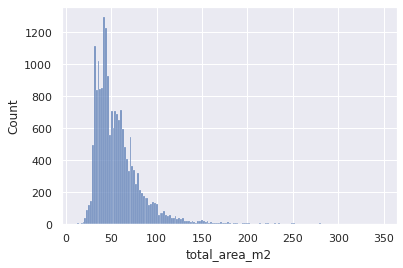

In [36]:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=data, x="total_area_m2")
plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b>

Мне очень понравился ресурс www.python-graph-gallery.com.
Но не смогла его применить.
Как нужно сделать?

Оригинальный код:
    
libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = sns.load_dataset("iris")

sns.histplot(data=df, x="sepal_length", kde=True)
plt.show()

    
Моя 105-я версия попытки:
    
import seaborn as sns
import matplotlib.pyplot as plt
data1 = data
set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = sns.load_dataset('data1')

sns.histplot(data=df, x=data1["total_area_m2"], kde=True)
plt.show()

    
Дальше я уже не пыталась сделать красиво, пользовалась работающими методами.    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Насколько я понял ты хотела сделать как выше

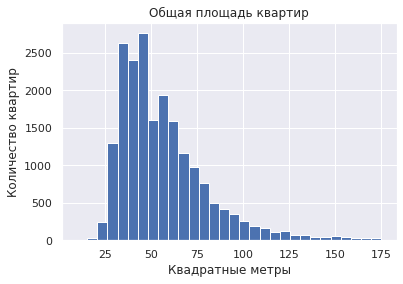

In [37]:
# Общая площадь недвижимости:
plt.hist(data['total_area_m2'], bins=30, range=(10,175))
plt.title('Общая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

У большинства квартир общая площадь от 60 м2 и меньше.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо строишь необходимые по заданию гистограммы

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Могу посоветовать посмотреть данные материалы, чтобы научиться оформлять графики еще лучше:

[Здесь](https://pyprog.pro/mpl/mpl_title.html)
  
[И здесь](https://pyprog.pro/mpl/mpl_axis_signatures.html)
    
[И вот тут](https://www.python-graph-gallery.com)
    
   

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо за ссылки! 95% кода и комментариев ниже, я добавила уже после первой проверки.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Рад помочь

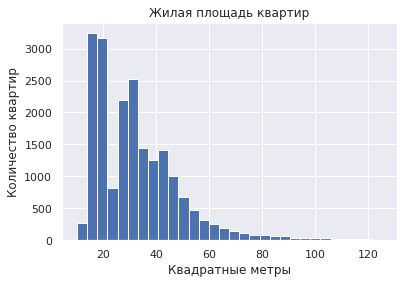

In [38]:
# Жилая площади недвижимости:
plt.hist(data['living_area_m2'], bins=30, range=(10,125))
plt.title('Жилая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Чаще всего жилая площадь составляет менее 30-35 м2.

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Хорошо

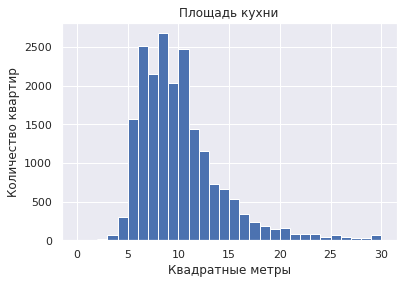

In [39]:
# Площадь кухни:
plt.hist(data['kitchen_area_m2'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Как правило площадь у кухонь менее 10 м2.

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Выглядит правдоподобно

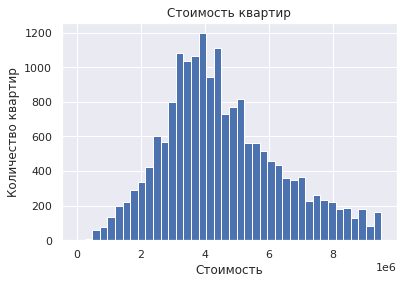

In [40]:
# Стоимость квартиры:
plt.hist(data['last_price'], bins=40, range=(0, 9500000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

Больше половины проданных квартир стоили от 3-х до 6-ти миллионов.

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Кажется, что так и должно быть для Спб и ЛО

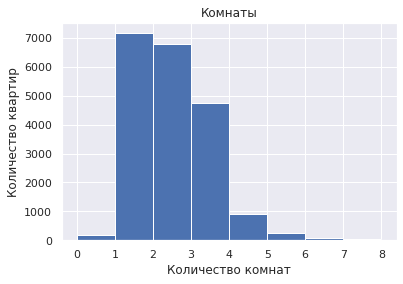

In [41]:
# Количество комнат:
plt.hist(data['number_of_rooms'], bins=8, range=(0,8))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

1- и 2-комнатные квартиры пользуются наибольшим спросом.

<div class="alert alert-warning">
<b>Комментарий ревьюера v 2.0 ⚠️:</b> Хорошо, но ограничивать слева единицей все же ни к чему)

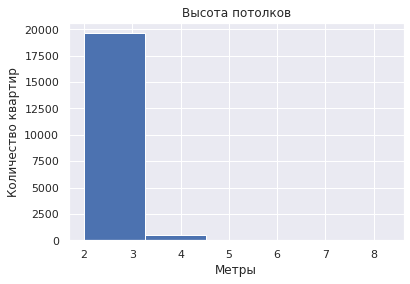

In [42]:
# Высота потолков:
plt.hist(data['ceiling_height_m'], bins=5)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

У 80-85% квартир высота потолков менее 3-х метров.

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Отлично

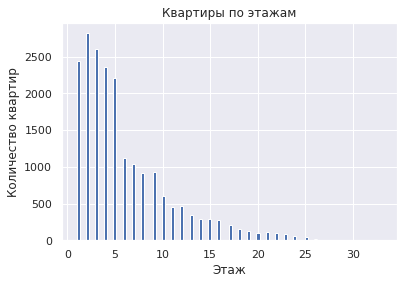

In [43]:
# Этаж квартиры:
plt.hist(data['floor'], bins=100)
plt.title('Квартиры по этажам')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

Наибольшим спросом пользуются квартиры со 2-го по 10-й этаж.

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> В основном застройка невысокой этажности

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Но по заданию также просили проанализировать представленные гистограммы, сейчас к сожалению ни у всех графиков есть описание
    
Также обрати внимание, что по заданию просили построить гистограммы еще по нескольким столбцам

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Ниже в описании к самому коду указано "тип этажа квартиры", но график ты пытаешься построить по цене и пайчарт по этому столбцу построить не получится из-за крайне большого количества значений

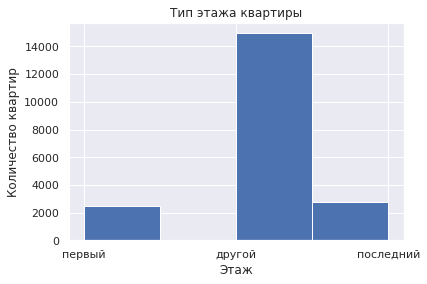

In [44]:
# Тип этажа квартиры («первый», «последний», «другой»):
plt.hist(data['floor_category'], bins=4)
plt.title('Тип этажа квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

Первый и последний этаж одинаково непопулярны.

<div class="alert alert-danger">
<b>Комментарий ревьюера v 2.0 ❌:</b> Столбец назван неверно, из-за этого гистограмма не строится

<div class="alert alert-success">
<b>Комментарий ревьюера v 3.0 ✔️:</b> Всё поправила

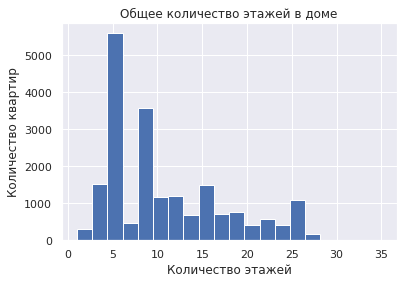

In [45]:
# Общее количество этажей в доме:
plt.hist(data['total_floors_in_building'], bins=20)
plt.title('Общее количество этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

Пятиэтажки уверенно лидируют, хотя здания не выше 10-ти этажей достойно занимают второе место.

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Типовые дома выделяются

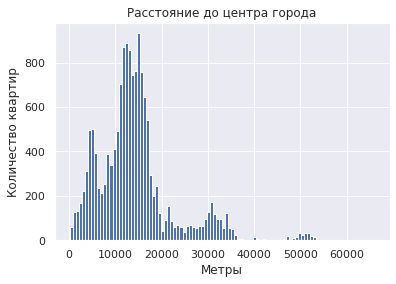

In [46]:
# Расстояние до центра города в метрах:
plt.hist(data['city_center_distance_m'], bins=100)
plt.title('Расстояние до центра города')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Самые популярные квартиры расположены в 10000-20000 метрах от центра города.

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Логично

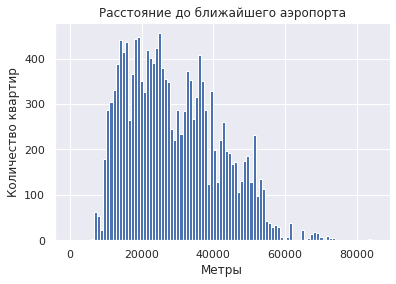

In [47]:
# Расстояние до ближайшего аэропорта:
plt.hist(data['nearest_airport_distance_m'], bins=100)
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

В подавляющем большинстве квартиры расположены не дальше 40000 метров или 4-х километров от ближайшего аэропорта.

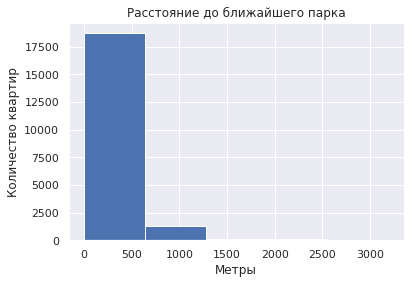

In [48]:
# Расстояние до ближайшего парка:
plt.hist(data['nearest_park_distance_m'], bins=5)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Почти все квартиры радуют близостью к парку - расстояние не более 500 м.

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Параметры удаленности разобраны

<div class="alert alert-danger">
<b>Комментарий ревьюера v 2.0 ❌:</b> Но к сожалению гистограмм по дню и месяцу все еще нет

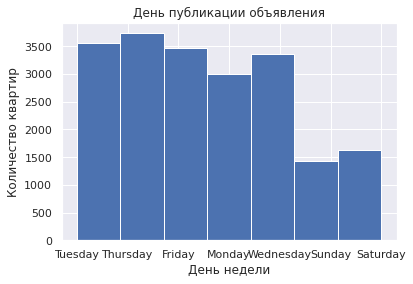

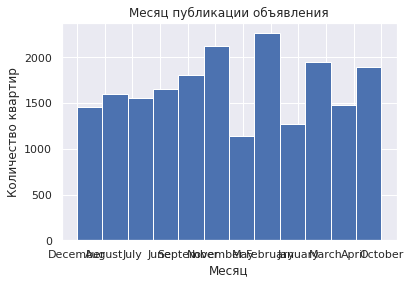

In [49]:
# День и месяц публикации объявления:
plt.hist(data['day_of_week_exposition'], bins=7)
plt.title('День публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()

plt.hist(data['month_exposition'], bins=12)
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

Ожидаемо, люди чаще размещают объявления по будням, а в выходные дни было размещено в 2 раза меньше.
Самые популярные месяцы, это конец и начало года: октябрь, ноябрь, февраль, март. К маю серьезная просадка, но летом всё выравнивается и идёт стабильно.

<div class="alert alert-success">
<b>Комментарий ревьюера v 3.0 ✔️:</b> Отлично!

<div class="alert alert-warning">
<b>Комментарий ревьюера v 3.0 ⚠️:</b> Хорошо бы только отредактировать графики, чтобы подписи не ложились друг-на-друга

Среднее значение: 182.1679389312977
Медиана: 97.0


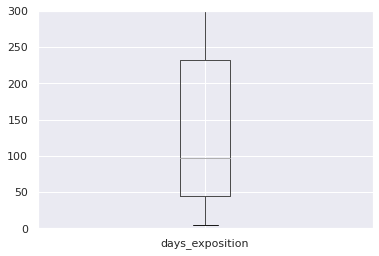

In [50]:
# Изучим как быстро продавались квартиры:
data.boxplot(['days_exposition'])
plt.ylim(0, 300)
print('Среднее значение:', data['days_exposition'].mean())
print('Медиана:', data['days_exposition'].median())

Для продажы недвижимости минимум необходимо 1.5-2 месяца, как правило 3-3.5. 

Но также, редко процесс реализации занимает более 8-ми месяцев.

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Хороший график для анализа, но к сожалению ты не добавила ответы на вопросы

Продажи квартир за менее чем 1-1.5 месяца я бы отнесла к аномально быстрым. Подобные случаи могут быть мошенническими.

<div class="alert alert-danger">
<b>Комментарий ревьюера v 2.0 ❌:</b> Хорошо, но какие продажи можно назвать аномально быстрыми?

<div class="alert alert-success">
<b>Комментарий ревьюера v 3.0 ✔️:</b> Отлично

Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Изучим, зависит ли цена от:

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Построим графики, которые покажут зависимость цены от указанных выше параметров и рассчитаем коэффициент Пирсона

<div class="alert alert-danger">
<b>Комментарий ревьюера v 2.0 ❌:</b> Но корреляция Пирсона не расчитана и не описана)

<div class="alert alert-success">
<b>Комментарий ревьюера v 3.0 ✔️:</b> Всё добавлено

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции: 0.28468375495930376


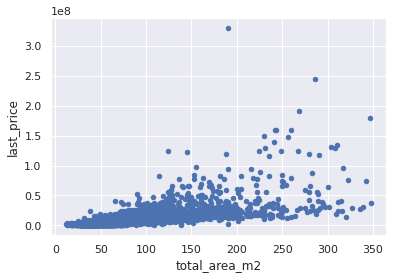

In [51]:
# Зависимость цены от общей площади:
data.plot(x='total_area_m2', y='last_price', kind='scatter', grid=True)

print("Коэффициент корреляции:", data['total_area_m2'].corr(data['price_per_square_meter']))

Коэффициент корреляции: 0.29 - слабая зависимость цены от общей площади.

<div class="alert alert-danger">
<b>Комментарий ревьюера v 2.0 ❌:</b> Здесь и далее строишь правильные графики, но завсимости все же стоит описать)

<div class="alert alert-success">
<b>Комментарий ревьюера v 3.0 ✔️:</b> Все зависимости описаны, здорово

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции: 0.2061860280889381


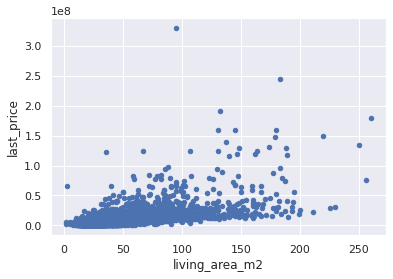

In [52]:
# Зависимость цены от жилой площади:
data.plot(x='living_area_m2', y='last_price', kind='scatter', grid=True)

print("Коэффициент корреляции:", data['living_area_m2'].corr(data['price_per_square_meter']))

Коэффициент корреляции: 0.21 - слабая зависимость цены от жилой площади.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции: 0.375812181424366


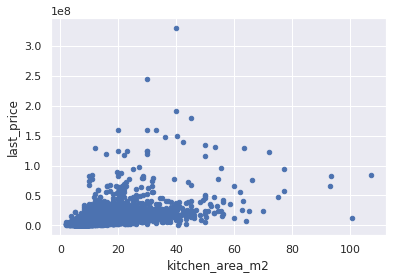

In [53]:
# Зависимость цены от площади кухни:
data.plot(x='kitchen_area_m2', y='last_price', kind='scatter', grid=True)

print("Коэффициент корреляции:", data['kitchen_area_m2'].corr(data['price_per_square_meter']))

Коэффициент корреляции: 0.38 - слабая зависимость цены от площади кухни.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции: 0.03282732414605511


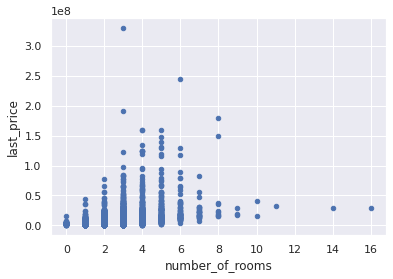

In [54]:
# Зависимость цены от количества комнат:
data.plot(x='number_of_rooms', y='last_price', kind='scatter', grid=True)

print("Коэффициент корреляции:", data['number_of_rooms'].corr(data['price_per_square_meter']))

Коэффициент корреляции: 0.03 - очень слабая (можно сказать отсутствует) зависимость цены от количества комнат.

In [63]:
#corr = data[['price_per_square_meter',\
          # 'total_area_m2',\
           #'living_area_m2',\
          # 'kitchen_area_m2',\
          # 'number_of_rooms']].corr()
#corr.style.background_gradient(cmap='coolwarm')

corr = data[['price_per_square_meter',\
           'total_area_m2',\
           'living_area_m2',\
           'kitchen_area_m2',\
           'number_of_rooms',\
           'floor_category',\
           'day_of_week_exposition',\
           'month_exposition',\
           'year_exposition']].corr()
corr.style.background_gradient(cmap='coolwarm')

,price_per_square_meter,total_area_m2,living_area_m2,kitchen_area_m2,number_of_rooms,year_exposition
price_per_square_meter,1.000000,0.284684,0.206186,0.375812,0.032827,-0.008721
total_area_m2,0.284684,1.000000,0.940256,0.633915,0.783362,-0.123223
living_area_m2,0.206186,0.940256,1.000000,0.449937,0.850097,-0.115253
kitchen_area_m2,0.375812,0.633915,0.449937,1.000000,0.302548,-0.076685
number_of_rooms,0.032827,0.783362,0.850097,0.302548,1.000000,-0.098637
year_exposition,-0.008721,-0.123223,-0.115253,-0.076685,-0.098637,1.000000


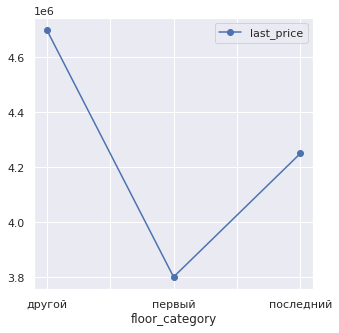

In [66]:
# Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой):

data.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))

plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера v 3.0 ✔️:</b> Сейчас график верный

<div class="alert alert-danger">
<b>Комментарий ревьюера v 2.0 ❌:</b> Для категории этажа диаграмма рассеяния не подойдет, она опишет только частотность распределения, но нам ведь нужно посмотреть на <b>связь</b> с ценой

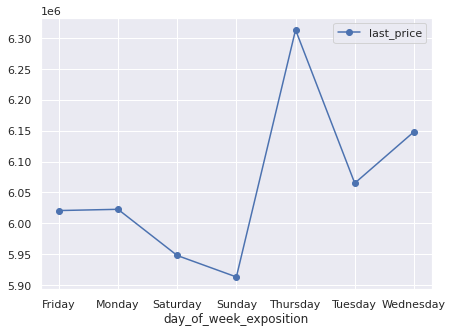

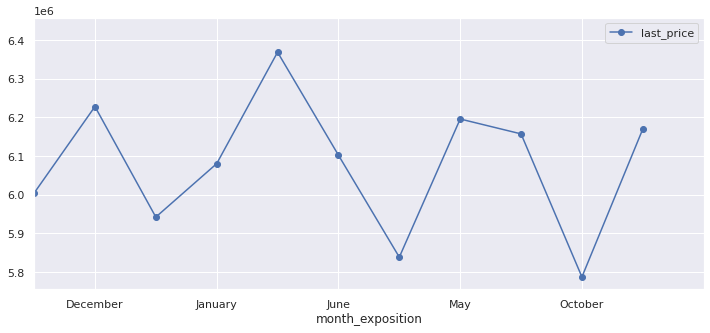

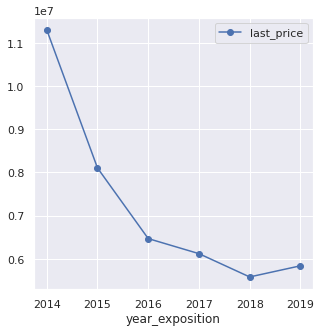

In [68]:
# Зависимость от дня размещения
(
    data.pivot_table(index='day_of_week_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    data.pivot_table(index='month_exposition', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(12, 5))
)
plt.show()
# Зависимость от года размещения
(
    data.pivot_table(index='year_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

In [69]:
# Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
# Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
location_pivot_table = data.pivot_table(index = 'location', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
location_pivot_table.columns = ['count', 'mean']
location_pivot_table = location_pivot_table.sort_values('count', ascending = False).head(10)
print(location_pivot_table)
#самая высокая стоимость
print(location_pivot_table[location_pivot_table['mean']==location_pivot_table['mean'].max()])
#самая низкая стоимость
print(location_pivot_table[location_pivot_table['mean']==location_pivot_table['mean'].min()])

                   count           mean
location                               
санкт-петербург    13418  112059.464376
поселок мурино       541   85577.794824
поселок шушары       404   77938.121287
всеволожск           339   68570.150442
колпино              304   74937.565789
пушкин               304  102088.536184
поселок парголово    298   89421.389262
деревня кудрово      297   92408.225589
гатчина              264   67916.439394
выборг               206   57127.650485
                 count           mean
location                             
санкт-петербург  13418  112059.464376
          count          mean
location                     
выборг      206  57127.650485


Ожидаемо, что в Санкт-Петербурге самый дорогой квадратный метр, Выборг занимает последнее 10-е место.

<div class="alert alert-success">
<b>Комментарий ревьюера v 3.0 ✔️:</b> Ты правильно ответила на вопрос задания!

<div class="alert alert-danger">
<b>Комментарий ревьюера v 2.0 ❌:</b> Не совсем верно, здесь ведь сначала нужно определить топ-10 по числу объявлений, а уже в них искать max и min средние цены

                                          mean
                        price_per_square_meter
city_center_distance_km                       
0.0                              226876.052632
1.0                              159782.839506
2.0                              152632.251969
3.0                              116462.205882
4.0                              129728.082601
5.0                              137068.835958
6.0                              147484.323587
7.0                              151390.055394
8.0                              122237.942688
9.0                              110724.812992
10.0                             110822.784000
11.0                             106319.356232
12.0                             106107.914801
13.0                             106463.262995
14.0                             103025.257220
15.0                             102218.318047
16.0                              99073.483666
17.0                              95594.060759
18.0         

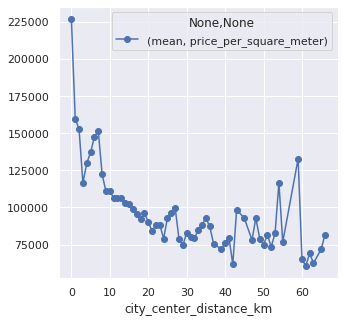

In [72]:
# Вычислим среднюю цену каждого километра при удалении от центра города,
# посмотрим как расстояние до центра города влияет на стоимость объекта:
print(data.pivot_table(index='city_center_distance_km', values='price_per_square_meter', aggfunc = ['mean']).head(30))
data.pivot_table(index='city_center_distance_km', values='price_per_square_meter', aggfunc = ['mean']).plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

В радиусе 3-х километров от центра самые дорогие квартиры. 3-5 км - резкое падение стоимости, почти в 2 раза. 
6-7 км небольное удорожание, после 9-го км в основном стабильный тред на снижение стоимости за километр, с всплеском к удорожанию между 50-м и 60-м км.

<div class="alert alert-success">
<b>Комментарий ревьюера v 3.0 ✔️:</b> Совершенно верно!

<div class="alert alert-danger">
<b>Комментарий ревьюера v 2.0 ❌:</b> Также немного не то. По заданию просили посчитать средние цены для <b>каждого</b> километра, но сейчас посчитано не то. Попробуй собрать пивот, взяв в индекс километры и рассчитав средние цены

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Тут почему-то код заканчивается, хотя по ТЗ еще было несколько заданий. Добавь пожалуйста их и общий вывод в следующей итерации

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Екатерина, проект отличный! У тебя очень сильные аналитические навыки и владение инструментами для проведения исследования. Но всё же в проекте отсутствует несколько разделов и у меня есть несколько других замечаний, и я попрошу тебя исправить их, чтобы проект стал еще лучше! </div>

### Общий вывод

Обработан полученный архив данных: 

- пропущенные значения там, где это необходимо, были заполнены;
- заменили типы данных на необходимые для удобной работы;
- посчитали и добавили в таблицу цену квадратного метра жилья;
- вывели из даты дни недели, месяцы и года размещения объявлений;
- добавили категории по этажам квартир. 

Изучили следующие параметры на наличие выбивающихся значений - общая площадь, итоговая цена, общая этажность и высота потолков. Были определены аномалии в данных параметрах.

**Срок продажи квартиры:**

Чаще всего квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев.

**Факторы, влияющие на стоимость:**

На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

**Стоимость квадратного метра в топ-10 населённых пунктов:**

Дороже всего квадратный метр в Санкт-Петербурге - 112060

Дешевле всего квадратный метр в Выборге - 57128

<div class="alert alert-danger">
<b>Комментарий ревьюера v 2.0 ❌:</b> У любого исследования должен быть общий вывод по его результатам)

<div class="alert alert-success">
<b>Комментарий ревьюера v 3.0 ✔️:</b> Общий вывод добавлен, молодец

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод